In [155]:
import pandas as pd
import geopandas as gpd
from pathlib import Path
import matplotlib.pyplot as plt

In [156]:
gdf = gpd.read_file("data/행정구역시군구경계/LARD_ADM_SECT_SGG_서울.zip", ) # 원래는 EPSG:5179
gdf = gdf.to_crs("EPSG:4326")


In [157]:
path = Path("./data/DEM/서울특별시/2014 서울특별시[ascii]")
dem = []
for p in path.glob("*.txt"):
    dem.append(pd.read_csv(p, sep=" ", header=None))

dem = pd.concat(dem)

dem.columns = ["x", "y", "z"]
dem = gpd.GeoDataFrame(
    data=dem.z,
    geometry=gpd.points_from_xy(x=dem.x, y=dem.y),
    crs="EPSG:5186" # 아놔..
)
dem = dem.to_crs("EPSG:4326")


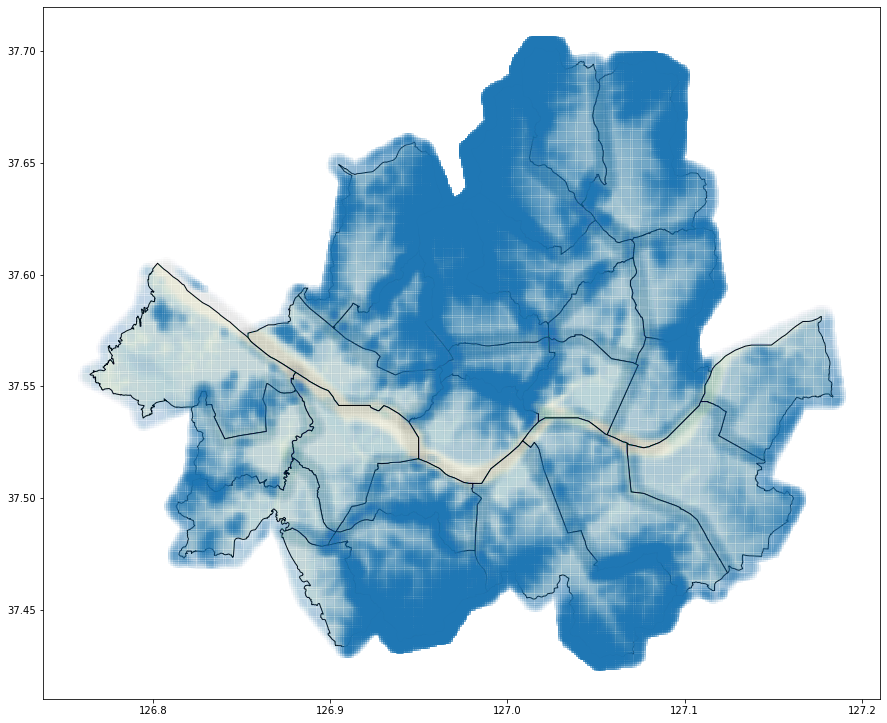

In [158]:


fig, ax = plt.subplots(figsize=(15,15))

gdf.plot(ax=ax, color="ivory", alpha=1, edgecolor="black" )

ax.scatter(dem.geometry.x , dem.geometry.y , alpha=dem.z/dem.z.max(), marker="s")
